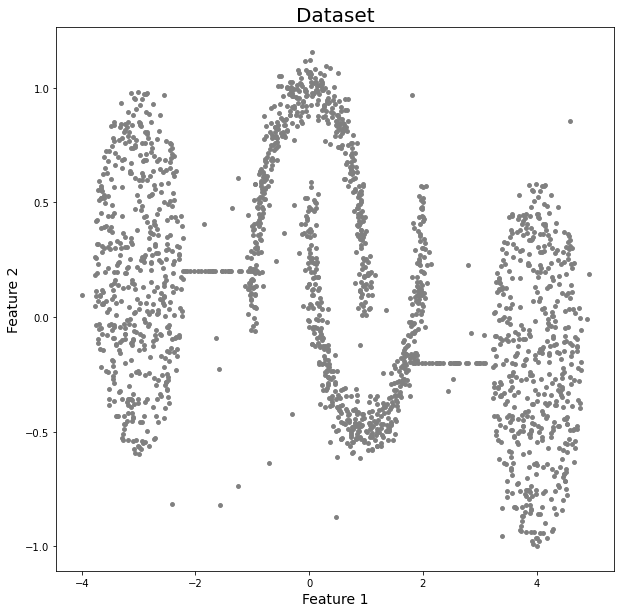

,1,2
0,-2.732266,0.114539
1,-0.220620,0.993082
2,3.384142,-0.956659
3,-3.318088,0.828219
4,-3.049270,0.906074
...,...,...
1995,3.980801,-0.018302
1996,-2.945209,0.596871
1997,3.563392,0.439363
1998,-3.598230,0.196519


In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import data 
mat = scipy.io.loadmat('dbscan2000.mat')

data_table = pd.DataFrame(mat['data'])

#plot data
plt.figure(figsize=(10,10))
plt.scatter([i[0][0] for i in data_table[0]],[i[0][0] for i in data_table[1]],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

feature_1 = [i[0][0] for i in data_table[0]]
feature_2 = [i[0][0] for i in data_table[1]]

data_table = pd.DataFrame({"1": feature_1, "2": feature_2})


data_table

In [2]:
#check if the data has null values
data_table.isnull().any().any()

False

In [3]:
total_points = data_table.shape[0]

In [4]:
#get array of values from the dataframe
x = data_table.loc[:, :].values

x

array([[-2.73226642,  0.11453887],
       [-0.22062047,  0.99308232],
       [ 3.3841416 , -0.95665906],
       ...,
       [ 3.56339167,  0.43936267],
       [-3.59822956,  0.1965186 ],
       [ 4.02733159, -0.19364141]])

Text(0, 0.5, '8-neighbour distance')

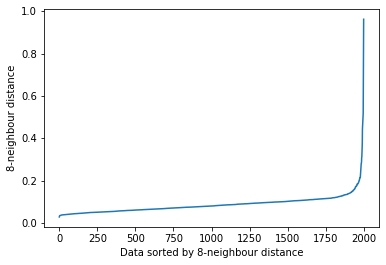

In [5]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

#find upto 8th neighbours
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(x)
#function returns the distances and indices of the neighours
distances, indices = neighbors_fit.kneighbors(x)

#sort the 8th neighbour distance
distances = np.sort(distances[:, -1])

#plot the distances
plt.plot(np.arange(len(distances)), distances)
plt.xlabel('Data sorted by {}-neighbour distance'.format(8))
plt.ylabel('{}-neighbour distance'.format(8))

Text(0, 0.5, '8-neighbour distance')

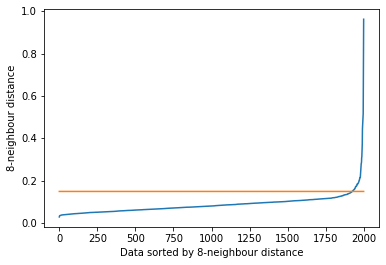

In [6]:
plt.plot(np.arange(len(distances)), distances)

#plot the assumed epsilon distance
plt.plot(np.arange(len(distances)), [0.15]*len(distances))
plt.xlabel('Data sorted by {}-neighbour distance'.format(8))
plt.ylabel('{}-neighbour distance'.format(8))

In [7]:
#set eps and minPts
eps = 0.15
minPts = 13

[-1  0  1  2  3]


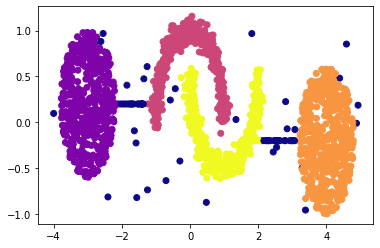

In [9]:
import scipy as scipy

#find distance matrix which contains the distances between every pair of points in the dataset
distance_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(x, 'euclidean'))

#function to expand a cluster
def grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_point, type_point, visited,distance_matrix):
    for i in neighbours_point:
        if visited[i] == 0:
                        visited[i] = 1
                        neighbours_cluster_point = _get_neighbors(i)
                        if len(neighbours_cluster_point) >= minPts:
                             grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_cluster_point, type_point, visited,distance_matrix)
        if type_point[i] == 0:
                         type_point[i] = cluster_index
    return type_point

#function to get neighbours
def _get_neighbors(x):
        return [i for i in np.where(distance_matrix[x] <= eps)[0]]

# -1 noise
# 0 border
# 1 core

#function to find the clusters
def dbscan(total_points, visited, minPts, cluster_index, clusters_list, eps, type_point, distance_matrix):
    for i in range(total_points):
        if visited[i] == 0:
            visited[i] = 1
            neighbours_point = _get_neighbors(i)
            if len(neighbours_point) < minPts:
                type_point[i] = -1
            else:
                    type_point[i] = cluster_index

                    type_point = grow_cluster(clusters_list, eps, minPts, cluster_index, neighbours_point, type_point, visited,distance_matrix)

                    cluster_index += 1
        else:
            continue
    return type_point
                
cluster_index = 0
clusters_list = []

visited = np.zeros(total_points, 'int')
type_point = np.zeros(total_points, 'int')

eps = 0.15
minPts = 13

type_point = dbscan(total_points, visited, minPts, cluster_index, clusters_list, eps, type_point, distance_matrix)
print(np.unique(type_point))

#plot the clusters
plt.scatter(x[:, 0], x[:,1], c = type_point, cmap= "plasma") 
plt.show() 